In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing import image as kimage

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
PATH = '/content/gdrive/My Drive/data/image_retrieval2/'
data = np.load(PATH+'images_mr.npy', allow_pickle=True)
print(data.shape)

data = data.astype(np.float32)
print(type(data[0,0,0,0]))

(9908, 86, 128, 3)
<class 'numpy.float32'>


(1, 86, 128, 3)


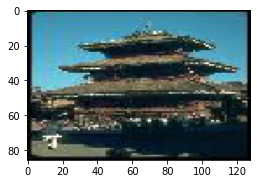

In [4]:
# load query
query = kimage.load_img(PATH+'q2.jpg', target_size=(86, 128))
query_np = kimage.img_to_array(query)
query_np = np.expand_dims(query_np, axis=0)
print(query_np.shape)

# show query
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.imshow(query)

In [6]:
# compute cosine
query_np = np.reshape(query_np,  (1, -1))
data = np.reshape(data, (data.shape[0], -1))
sims = cosine_similarity(query_np, data).squeeze()
print(sims.shape)

(9908,)


In [9]:
def getKey(item):
    return item[0]

lists = [i for i in range(data.shape[0])]
tps = zip(sims.tolist(), lists)
tps_sorted = sorted(tps, key=getKey, reverse=True)

for i in range(8):
    print(tps_sorted[i])

(1.0000332593917847, 3425)
(0.8503411412239075, 3306)
(0.8466805219650269, 3374)
(0.8460776209831238, 4645)
(0.8433058857917786, 4317)
(0.8431011438369751, 3780)
(0.8424921035766602, 6240)
(0.8418828248977661, 7530)


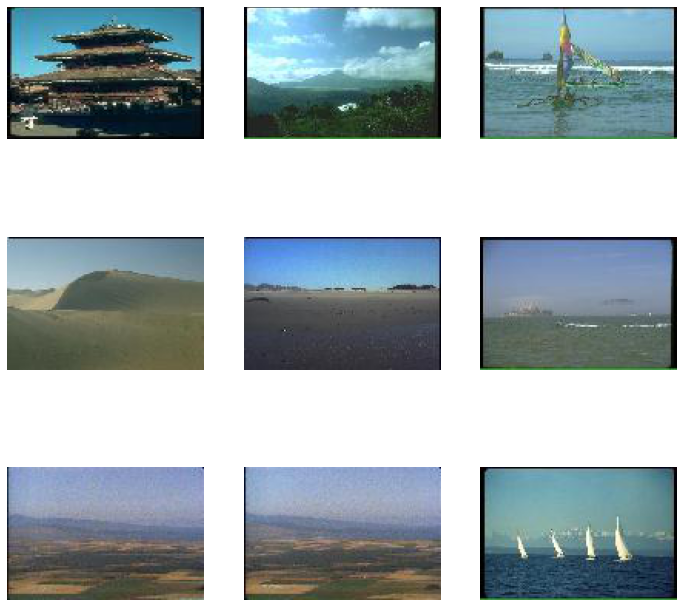

In [11]:
fig = plt.figure(figsize=(12,12))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    index = tps_sorted[i-1][1]
    img = data[index]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img.reshape((86, 128, 3))/255.0)